In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

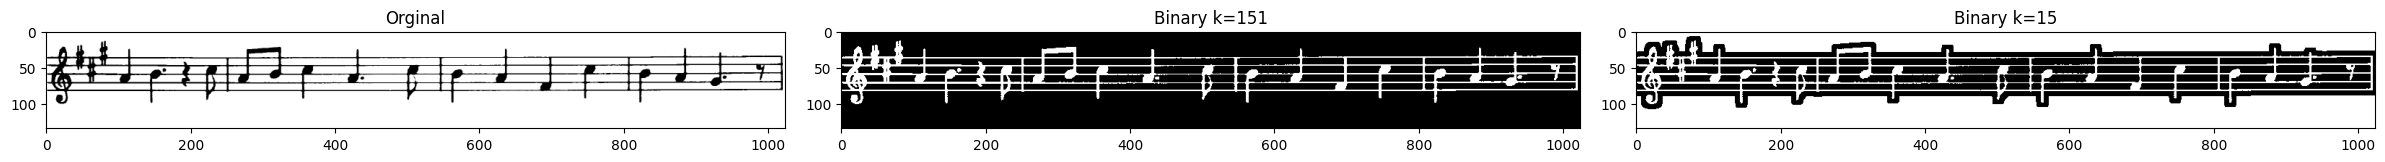

In [11]:
plt.figure(figsize=(24, 4))

img = cv.imread("../../../class.vision/images/notes.png", 0)
plt.subplot(131); plt.imshow(img, vmin=0, vmax=255, cmap="gray"); plt.title("Orginal")

binary_img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 151, -2)
plt.subplot(132); plt.imshow(binary_img, vmin=0, vmax=255, cmap="gray"); plt.title("Binary k=151")

binary_img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 15, -2)
plt.subplot(133); plt.imshow(binary_img, vmin=0, vmax=255, cmap="gray"); plt.title("Binary k=15")

plt.tight_layout()

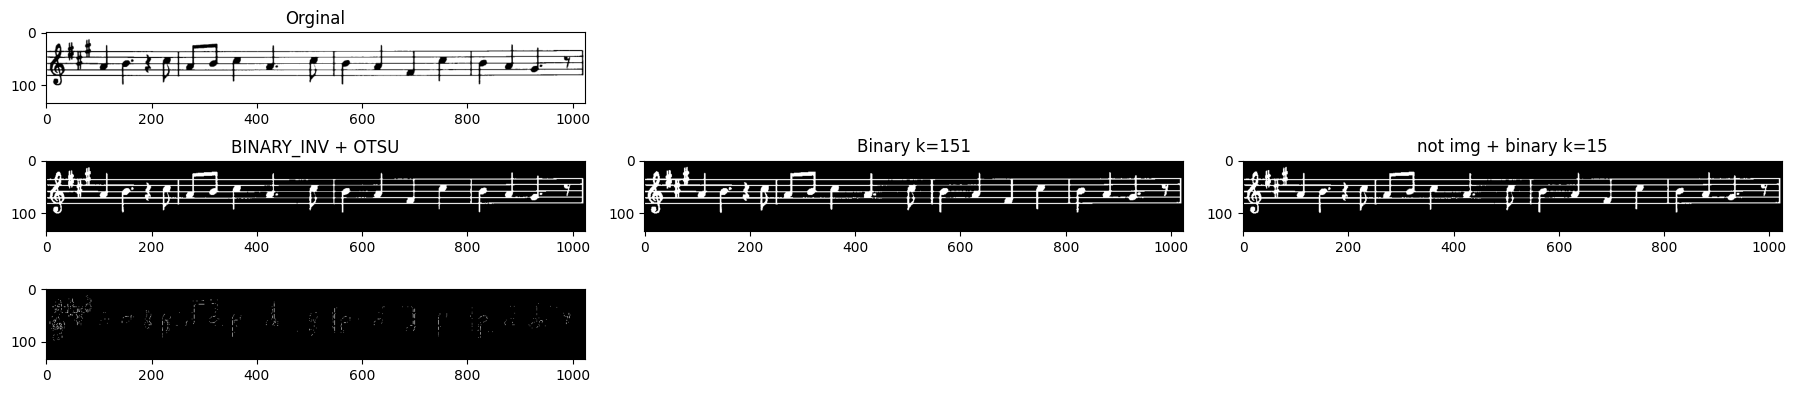

In [17]:
plt.figure(figsize=(24, 4))

img = cv.imread("../../../class.vision/images/notes.png", 0)
plt.subplot(341); plt.imshow(img, vmin=0, vmax=255, cmap="gray"); plt.title("Orginal")

ret, binary_img1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.subplot(345); plt.imshow(binary_img1, vmin=0, vmax=255, cmap="gray"); plt.title("BINARY_INV + OTSU")

binary_img2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 151, -2)
plt.subplot(346); plt.imshow(binary_img2, vmin=0, vmax=255, cmap="gray"); plt.title("Binary k=151")

binary_img3 = cv.adaptiveThreshold(cv.bitwise_not(img), 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)
plt.subplot(347); plt.imshow(binary_img3, vmin=0, vmax=255, cmap="gray"); plt.title("not img + binary k=15")

diff = cv.bitwise_xor(binary_img2, binary_img3)
plt.subplot(349); plt.imshow(diff, vmin=0, vmax=255, cmap="gray")

plt.tight_layout()
binary_img = binary_img3

(134, 1024) 1024 34
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


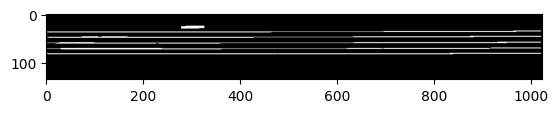

In [24]:
cols = binary_img.shape[1]
horizontal_size = cols // 30
print(binary_img.shape, cols, horizontal_size)

horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

print(horizontalStructure)
res = cv.morphologyEx(binary_img, cv.MORPH_OPEN, horizontalStructure)
plt.imshow(res, vmin=0, vmax=255, cmap="gray")

[[1]
 [1]
 [1]
 [1]]


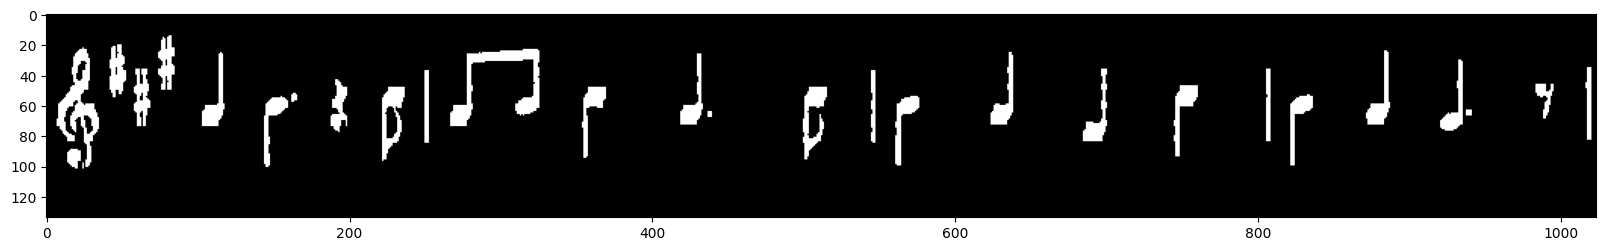

In [54]:
# Specify size on vertical axis
rows = binary_img.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
print(verticalStructure)

notes = cv.morphologyEx(binary_img, cv.MORPH_OPEN, verticalStructure)
plt.figure(figsize=(20,4))
plt.imshow(notes, vmin=0, vmax=255, cmap="gray")

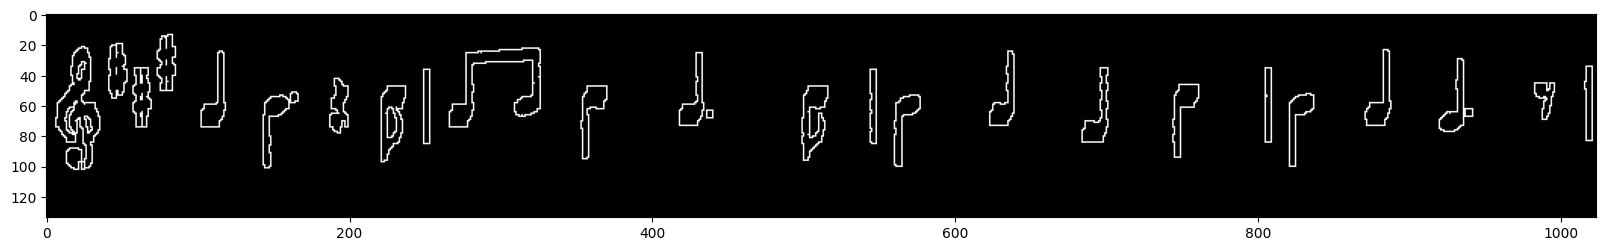

In [97]:
edges = cv.adaptiveThreshold(cv.bitwise_not(notes), 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)
plt.figure(figsize=(20,4))
plt.imshow(edges, vmin=0, vmax=255, cmap="gray")

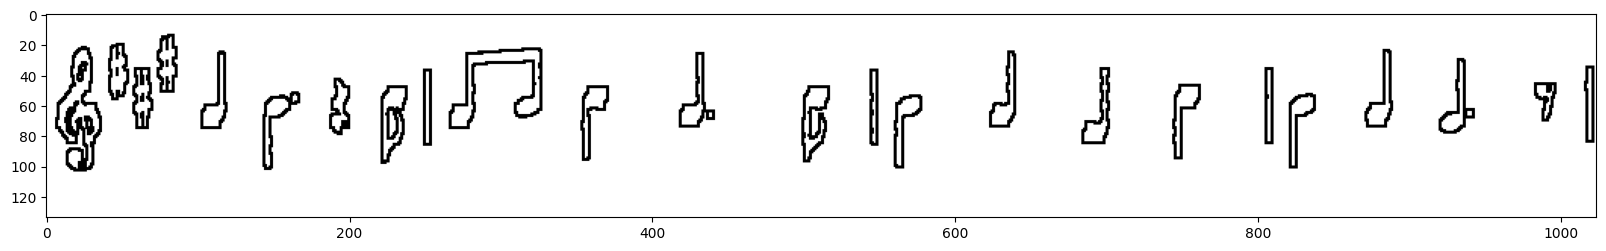

In [100]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
bold_edges = cv.bitwise_not(cv.dilate(edges, kernel))

plt.figure(figsize=(20,4))
plt.imshow(bold_edges, vmin=0, vmax=255, cmap="gray")

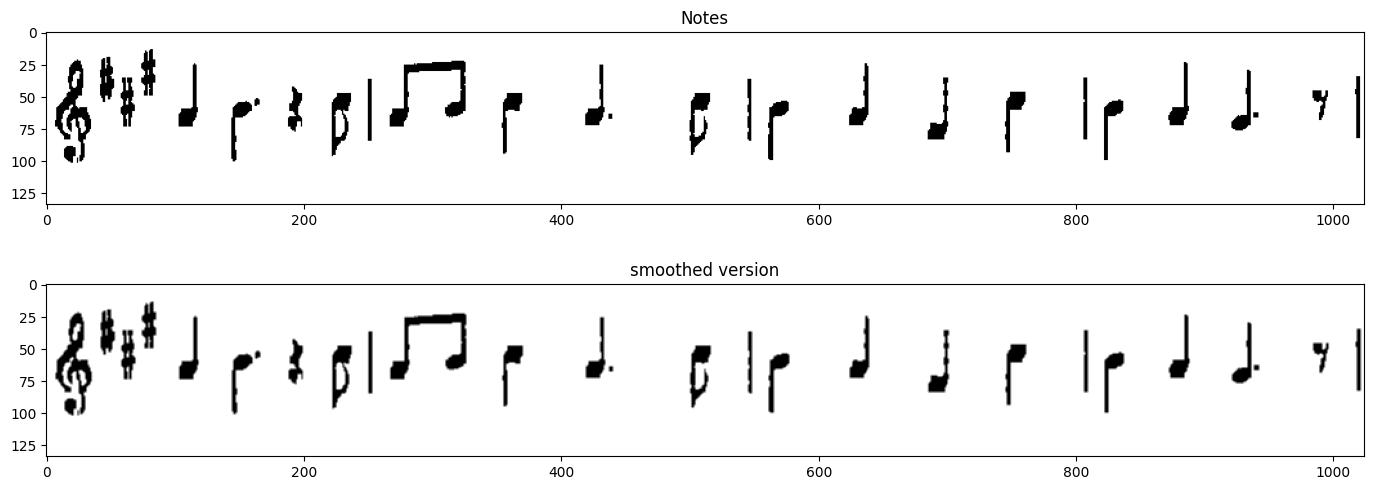

In [103]:
smooth = cv.blur(not_notes, (2, 2))
plt.figure(figsize=[17,6])
plt.subplot(211); plt.imshow(not_notes, cmap='gray');plt.title("Notes");
plt.subplot(212); plt.imshow(smooth, cmap='gray');plt.title("smoothed version");

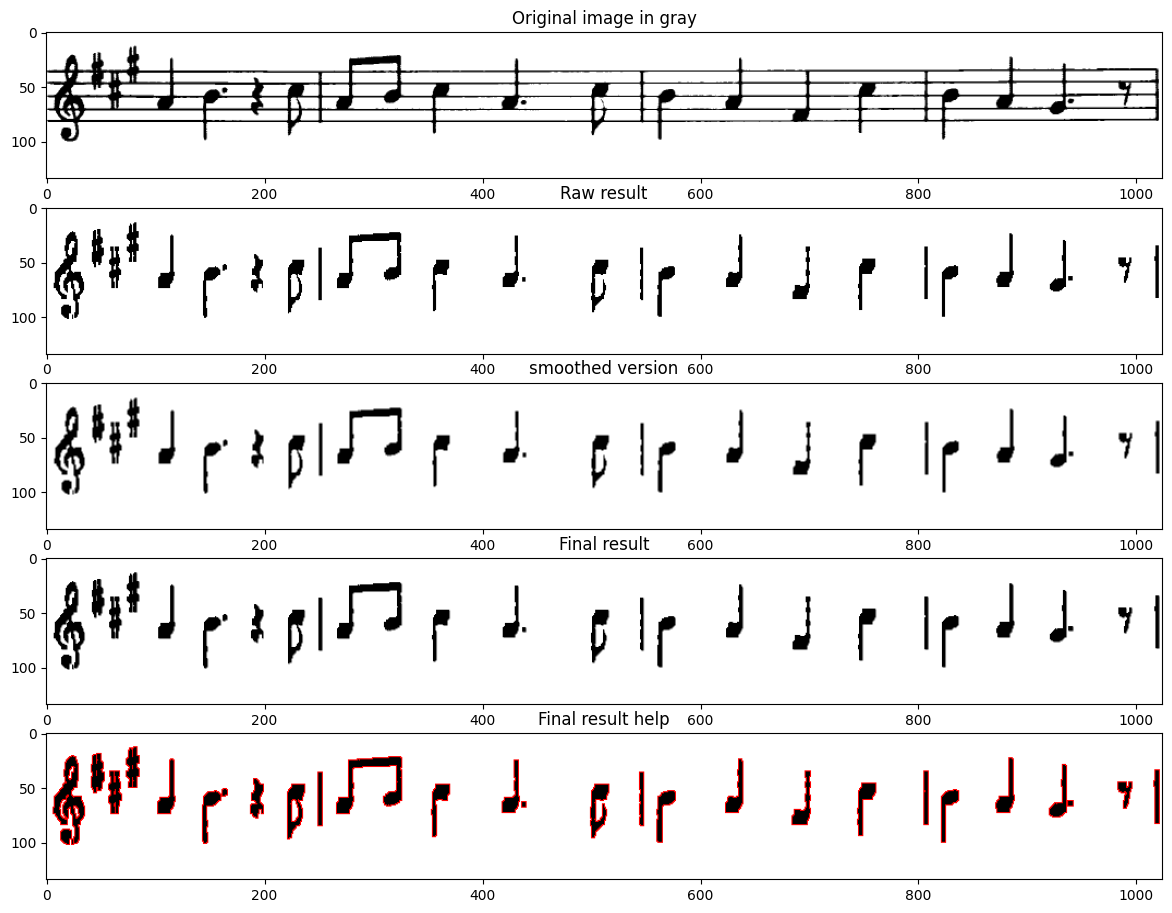

In [115]:
(rows, cols) = np.where(edges != 0)
final_result = np.copy(not_notes)
bgr_final_result = cv.cvtColor(final_result, cv.COLOR_GRAY2BGR)
bgr_smooth = cv.cvtColor(smooth, cv.COLOR_GRAY2BGR)
bgr_smooth[rows, cols, :] = (0, 0, 255)
final_result[rows, cols] = smooth[rows, cols]
bgr_final_result[rows, cols, :] = bgr_smooth[rows, cols, :]
plt.figure(figsize=[18,11])
plt.subplot(511);plt.imshow(img, cmap='gray');plt.title("Original image in gray");
plt.subplot(512);plt.imshow(not_notes, cmap='gray');plt.title("Raw result");
plt.subplot(513);plt.imshow(smooth, cmap='gray');plt.title("smoothed version");
plt.subplot(514);plt.imshow(final_result, cmap='gray');plt.title("Final result");
plt.subplot(515);plt.imshow(bgr_final_result[...,::-1]);plt.title("Final result help");